# Unsupervised Learning

MotivationThe goal of unsupervised learning is to find hidden patterns in unlabeled data  $\{x^{(1)},...,x^{(m)}\}$

Unsupervised learning is a kind of machine learning where a model must look for patterns in a dataset with no labels and with minimal human supervision. This is in contrast to supervised learning techniques, such as classification or regression, where a model is given a training set of inputs and a set of observations, and must learn a mapping from the inputs to the observations. In unsupervised learning, only the inputs are available, and a model must look for interesting patterns in the data.


In unsupervised learning, a dataset is provided without labels, and a model learns useful properties of the structure of the dataset. We do not tell the model what it must learn, but allow it to find patterns and draw conclusions from the unlabeled data.

The algorithms in unsupervised learning are more difficult than in supervised learning, since we have little or no information about the data. Unsupervised learning tasks typically involve grouping similar examples together, dimensionality reduction, and density estimation.

### Supervised Learning

The simplest kinds of machine learning algorithms are supervised learning algorithms. In supervised learning, a model is trained with data from a labeled dataset, consisting of a set of features, and a label. This is typically a table with multiple columns representing features, and a final column for the label. The model then learns to predict the label for unseen examples.

# K-means - Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)
$$

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

## Demonstration of K-Means Assumptions

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.


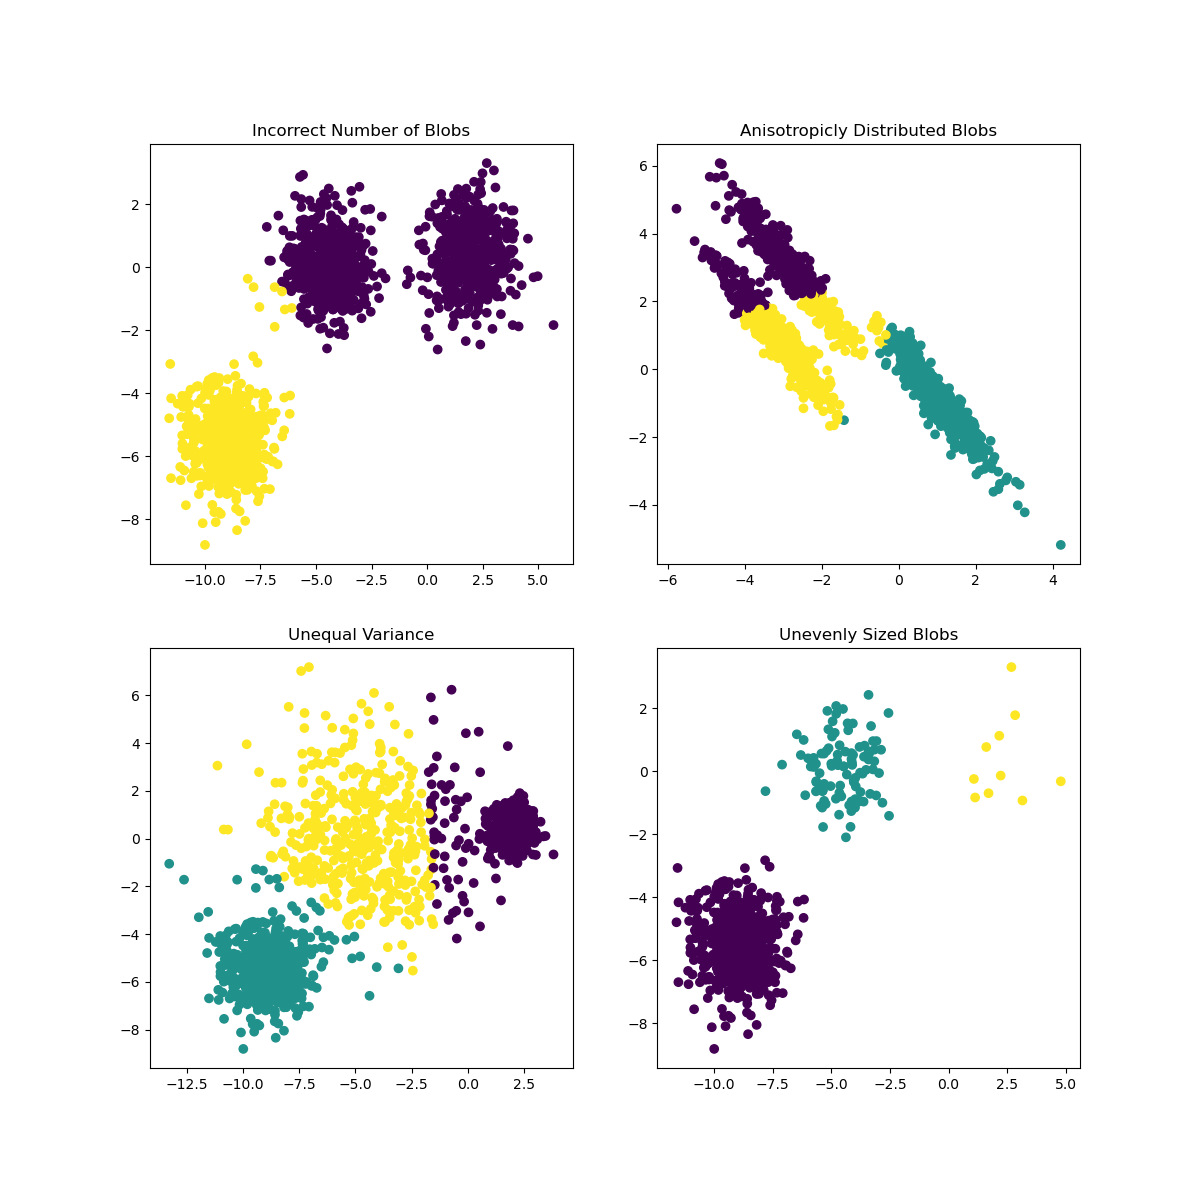

```python


import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

```

## K-Means Continued

K-means is often referred to as Lloyd\'s algorithm. In basic terms, the
algorithm has three steps. The first step chooses the initial centroids,
with the most basic method being to choose $k$ samples from the dataset
$X$. After initialization, K-means consists of looping between the two
other steps. The first step assigns each sample to its nearest centroid.
The second step creates new centroids by taking the mean value of all of
the samples assigned to each previous centroid. The difference between
the old and the new centroids are computed and the algorithm repeats
these last two steps until this value is less than a threshold. In other
words, it repeats until the centroids do not move significantly.


K-means is equivalent to the expectation-maximization algorithm with a
small, all-equal, diagonal covariance matrix.

The algorithm can also be understood through the concept of [Voronoi
diagrams](https://en.wikipedia.org/wiki/Voronoi_diagram). First the
Voronoi diagram of the points is calculated using the current centroids.
Each segment in the Voronoi diagram becomes a separate cluster.
Secondly, the centroids are updated to the mean of each segment. The
algorithm then repeats this until a stopping criterion is fulfilled.
Usually, the algorithm stops when the relative decrease in the objective
function between iterations is less than the given tolerance value. This
is not the case in this implementation: iteration stops when centroids
move less than the tolerance.

Given enough time, K-means will always converge, however this may be to
a local minimum. This is highly dependent on the initialization of the
centroids. As a result, the computation is often done several times,
with different initializations of the centroids. One method to help
address this issue is the k-means++ initialization scheme, which has
been implemented in scikit-learn (use the `init='k-means++'` parameter).
This initializes the centroids to be (generally) distant from each
other, leading to probably better results than random initialization, as
shown in the reference.

K-means++ can also be called independently to select seeds for other
clustering algorithms, see
`sklearn.cluster.kmeans_plusplus` for
details and example usage.

The algorithm supports sample weights, which can be given by a parameter
`sample_weight`. This allows to assign more weight to some samples when
computing cluster centers and values of inertia. For example, assigning
a weight of 2 to a sample is equivalent to adding a duplicate of that
sample to the dataset $X$.

K-means can be used for vector quantization. This is achieved using the
transform method of a trained model of `KMeans`.


## PCA - Decomposition

PCA is used to decompose a multivariate dataset in a set of successive
orthogonal components that explain a maximum amount of the variance. In
scikit-learn, `PCA`{.interpreted-text role="class"} is implemented as a
*transformer* object that learns $n$ components in its `fit` method, and
can be used on new data to project it on these components.

PCA centers but does not scale the input data for each feature before
applying the SVD. The optional parameter `whiten=True` makes it possible
to project the data onto the singular space while scaling each component
to unit variance. This is often useful if the models down-stream make
strong assumptions on the isotropy of the signal: this is for example
the case for Support Vector Machines with the RBF kernel and the K-Means
clustering algorithm.

Below is an example of the iris dataset, which is comprised of 4
features, projected on the 2 dimensions that explain most variance:
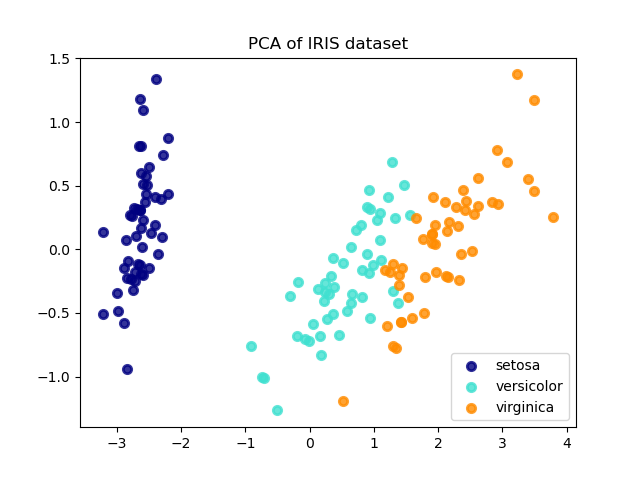

The PCA object also provides a probabilistic interpretation of the PCA that can give a likelihood of data based on the amount of variance it explains. As such it implements a score method that can be used in cross-validation:

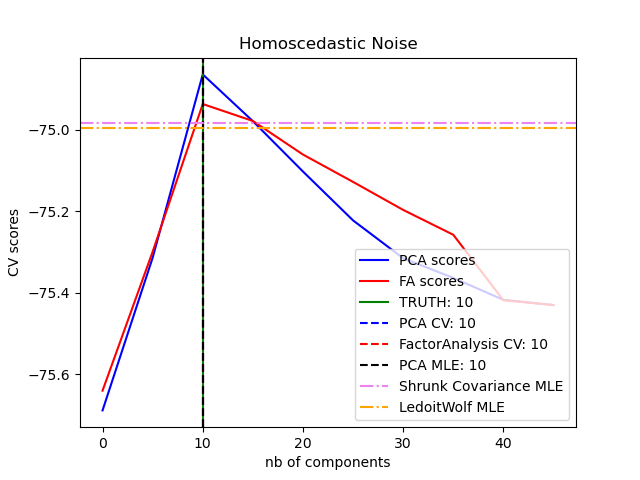

## Comparison of LDA and PCA 2D projection of Iris dataset
The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

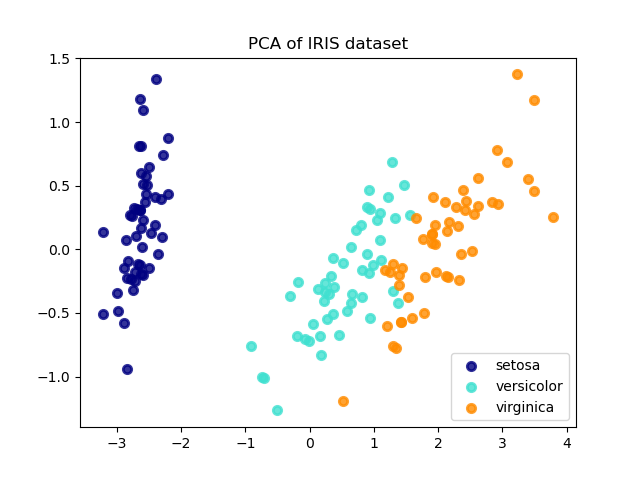

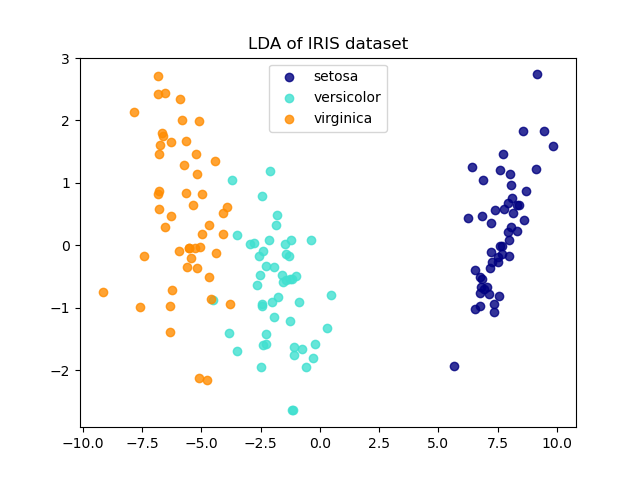
```python
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()
```

## Feature Preprocessing 

These are transformers that are not intended to be used on features, only on supervised learning targets. See also Transforming target in regression if you want to transform the prediction target for learning, but evaluate the model in the original (untransformed) space.


LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines. LabelEncoder can be used as follows:
```python
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

le.classes_

le.transform([1, 1, 2, 6])

le.inverse_transform([0, 0, 1, 2])
```

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels:

```python
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)

le.transform(["tokyo", "tokyo", "paris"])

list(le.inverse_transform([2, 2, 1]))
```



## Text feature extraction

Text Analysis is a major application field for machine learning
algorithms. However the raw data, a sequence of symbols cannot be fed
directly to the algorithms themselves as most of them expect numerical
feature vectors with a fixed size rather than the raw text documents
with variable length.

In order to address this, scikit-learn provides utilities for the most
common ways to extract numerical features from text content, namely:

-   **tokenizing** strings and giving an integer id for each possible
    token, for instance by using white-spaces and punctuation as token
    separators.
-   **counting** the occurrences of tokens in each document.
-   **normalizing** and weighting with diminishing importance tokens
    that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

-   each **individual token occurrence frequency** (normalized or not)
    is treated as a **feature**.
-   the vector of all the token frequencies for a given **document** is
    considered a multivariate **sample**.

A corpus of documents can thus be represented by a matrix with one row
per document and one column per token (e.g. word) occurring in the
corpus.

We call **vectorization** the general process of turning a collection of
text documents into numerical feature vectors. This specific strategy
(tokenization, counting and normalization) is called the **Bag of
Words** or \"Bag of n-grams\" representation. Documents are described by
word occurrences while completely ignoring the relative position
information of the words in the document.


Sparsity
--------

As most documents will typically use a very small subset of the words
used in the corpus, the resulting matrix will have many feature values
that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as
emails) will use a vocabulary with a size in the order of 100,000 unique
words in total while each document will use 100 to 1000 unique words
individually.

In order to be able to store such a matrix in memory but also to speed
up algebraic operations matrix / vector, implementations will typically
use a sparse representation such as the implementations available in the
`scipy.sparse` package.


`CountVectorizer` implements both
tokenization and occurrence counting in a single class:

```python

from sklearn.feature_extraction.text import CountVectorizer
```
This model has many parameters, however the default values are quite
reasonabl:

```python

vectorizer = CountVectorizer()
vectorizer

```
Let\'s use it to tokenize and count the word occurrences of a
minimalistic corpus of text documents:

```python
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    ]
    X = vectorizer.fit_transform(corpus)
    X
    #<4x9 sparse matrix of type '<... 'numpy.int64'>'
    #     with 19 stored elements in Compressed Sparse ... format>

```
The default configuration tokenizes the string by extracting words of at
least 2 letters. The specific function that does this step can be
requested explicitly:

```python
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (
        ['this', 'is', 'text', 'document', 'to', 'analyze'])
# True

```
Each term found by the analyzer during the fit is assigned a unique
integer index corresponding to a column in the resulting matrix. This
interpretation of the columns can be retrieved as follows:

```python
vectorizer.get_feature_names() == (
         ['and', 'document', 'first', 'is', 'one',
          'second', 'the', 'third', 'this'])
# True

X.toarray()
# array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
#       [0, 1, 0, 1, 0, 2, 1, 0, 1],
#       [1, 0, 0, 0, 1, 0, 1, 1, 0],
#       [0, 1, 1, 1, 0, 0, 1, 0, 1]]...)

```
The converse mapping from feature name to column index is stored in the
`vocabulary_` attribute of the vectorizer:

```python
vectorizer.vocabulary_.get('document')
# 1

```
Hence words that were not seen in the training corpus will be completely
ignored in future calls to the transform method:

```python
vectorizer.transform(['Something completely new.']).toarray()
#    array([[0, 0, 0, 0, 0, 0, 0, 0, 0]]...)

```
Note that in the previous corpus, the first and the last documents have
exactly the same words hence are encoded in equal vectors. In particular
we lose the information that the last document is an interrogative form.
To preserve some of the local ordering information we can extract
2-grams of words in addition to the 1-grams (individual words):

```python
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                         token_pattern=r'\b\w+\b', min_df=1)
    analyze = bigram_vectorizer.build_analyzer()
    analyze('Bi-grams are cool!') == (
         ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])
    # True

```
The vocabulary extracted by this vectorizer is hence much bigger and can
now resolve ambiguities encoded in local positioning patterns:

```python
    X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
    X_2
    # array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    #       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    #       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    #       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]]...)

```
In particular the interrogative form \"Is this\" is only present in the
last document:

```python
    feature_index = bigram_vectorizer.vocabulary_.get('is this')
    X_2[:, feature_index]
    # array([0, 0, 0, 1]...)

```
### Using stop words 

Stop words are words like \"and\", \"the\", \"him\", which are presumed
to be uninformative in representing the content of a text, and which may
be removed to avoid them being construed as signal for prediction.
Sometimes, however, similar words are useful for prediction, such as in
classifying writing style or personality.

There are several known issues in our provided \'english\' stop word
list. It does not aim to be a general, \'one-size-fits-all\' solution as
some tasks may require a more custom solution. 


Please take care in choosing a stop word list. Popular stop word lists
may include words that are highly informative to some tasks, such as
*computer*.

You should also make sure that the stop word list has had the same
preprocessing and tokenization applied as the one used in the
vectorizer. The word *we\'ve* is split into *we* and *ve* by
CountVectorizer\'s default tokenizer, so if *we\'ve* is in `stop_words`,
but *ve* is not, *ve* will be retained from *we\'ve* in transformed
text. Our vectorizers will try to identify and warn about some kinds of
inconsistencies.


Tf--idf term weighting
----------------------

In a large text corpus, some words will be very present (e.g. \"the\",
\"a\", \"is\" in English) hence carrying very little meaningful
information about the actual contents of the document. If we were to
feed the direct count data directly to a classifier those very frequent
terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values
suitable for usage by a classifier it is very common to use the tf--idf
transform.

Tf means **term-frequency** while tf--idf means term-frequency times
**inverse document-frequency**:
$\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}$.

Using the `TfidfTransformer`\'s default settings,
`TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)`
the term frequency, the number of times a term occurs in a given
document, is multiplied with idf component, which is computed as

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$,

where $n$ is the total number of documents in the document set, and
$\text{df}(t)$ is the number of documents in the document set that
contain term $t$. The resulting tf-idf vectors are then normalized by
the Euclidean norm:

$v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}$.

This was originally a term weighting scheme developed for information
retrieval (as a ranking function for search engines results) that has
also found good use in document classification and clustering.

The following sections contain further explanations and examples that
illustrate how the tf-idfs are computed exactly and how the tf-idfs
computed in scikit-learn\'s `TfidfTransformer` and `TfidfVectorizer`
differ slightly from the standard textbook notation that defines the idf
as

$\text{idf}(t) = \log{\frac{n}{1+\text{df}(t)}}.$

In the `TfidfTransformer` and
`TfidfVectorizer` with
`smooth_idf=False`, the \"1\" count is added to the idf instead of the
idf\'s denominator:

$\text{idf}(t) = \log{\frac{n}{\text{df}(t)}} + 1$

This normalization is implemented by the
`TfidfTransformer` class:
```python
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer
#    TfidfTransformer(smooth_idf=False)
```
Again please see the `reference documentation` for the
details on all the parameters.

Let\'s take an example with the following counts. The first term is
present 100% of the time hence not very interesting. The two other
features only in less than 50% of the time hence probably more
representative of the content of the documents:
```python

counts = [[3, 0, 1],
               [2, 0, 0],
               [3, 0, 0],
               [4, 0, 0],
               [3, 2, 0],
               [3, 0, 2]]
    
tfidf = transformer.fit_transform(counts)
tfidf
#    <6x3 sparse matrix of type '<... 'numpy.float64'>'
#        with 9 stored elements in Compressed Sparse ... format>

tfidf.toarray()
#    array([[0.81940995, 0.        , 0.57320793],
#           [1.        , 0.        , 0.        ],
#           [1.        , 0.        , 0.        ],
#           [1.        , 0.        , 0.        ],
#           [0.47330339, 0.88089948, 0.        ],
#           [0.58149261, 0.        , 0.81355169]])
```
Each row is normalized to have unit Euclidean norm:

$v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}$

For example, we can compute the tf-idf of the first term in the first
document in the [counts]{.title-ref} array as follows:

$n = 6$

$\text{df}(t)_{\text{term1}} = 6$

$\text{idf}(t)_{\text{term1}} =
\log \frac{n}{\text{df}(t)} + 1 = \log(1)+1 = 1$

$\text{tf-idf}_{\text{term1}} = \text{tf} \times \text{idf} = 3 \times 1 = 3$

Now, if we repeat this computation for the remaining 2 terms in the
document, we get

$\text{tf-idf}_{\text{term2}} = 0 \times (\log(6/1)+1) = 0$

$\text{tf-idf}_{\text{term3}} = 1 \times (\log(6/2)+1) \approx 2.0986$

and the vector of raw tf-idfs:

$\text{tf-idf}_{\text{raw}} = [3, 0, 2.0986].$

Then, applying the Euclidean (L2) norm, we obtain the following tf-idfs
for document 1:

$\frac{[3, 0, 2.0986]}{\sqrt{\big(3^2 + 0^2 + 2.0986^2\big)}}
= [ 0.819,  0,  0.573].$

Furthermore, the default parameter `smooth_idf=True` adds \"1\" to the
numerator and denominator as if an extra document was seen containing
every term in the collection exactly once, which prevents zero
divisions:

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

Using this modification, the tf-idf of the third term in document 1
changes to 1.8473:

$\text{tf-idf}_{\text{term3}} = 1 \times \log(7/3)+1 \approx 1.8473$

And the L2-normalized tf-idf changes to

$\frac{[3, 0, 1.8473]}{\sqrt{\big(3^2 + 0^2 + 1.8473^2\big)}}
= [0.8515, 0, 0.5243]$:
```python
transformer = TfidfTransformer()
transformer.fit_transform(counts).toarray()
#    array([[0.85151335, 0.        , 0.52433293],
#           [1.        , 0.        , 0.        ],
#           [1.        , 0.        , 0.        ],
#           [1.        , 0.        , 0.        ],
#           [0.55422893, 0.83236428, 0.        ],
#           [0.63035731, 0.        , 0.77630514]])
```
The weights of each feature computed by the `fit` method call are stored
in a model attribute:

```python
transformer.idf_
#    array([1. ..., 2.25..., 1.84...])
```
As tf--idf is very often used for text features, there is also another
class called `TfidfVectorizer`{.interpreted-text role="class"} that
combines all the options of `CountVectorizer`{.interpreted-text
role="class"} and `TfidfTransformer`{.interpreted-text role="class"} in
a single model:

```python
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus)
#    <4x9 sparse matrix of type '<... 'numpy.float64'>'
#        with 19 stored elements in Compressed Sparse ... format>
```
While the tf--idf normalization is often very useful, there might be
cases where the binary occurrence markers might offer better features.
This can be achieved by using the `binary` parameter of
`CountVectorizer`{.interpreted-text role="class"}. In particular, some
estimators such as `bernoulli_naive_bayes`{.interpreted-text role="ref"}
explicitly model discrete boolean random variables. Also, very short
texts are likely to have noisy tf--idf values while the binary
occurrence info is more stable.
## Clustering Documents 

```python
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import sys
from time import time

import numpy as np



minibatch=True 
n_features=10000
use_idf=True
# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=n_features,
                             min_df=2, stop_words='english',
                             use_idf=use_idf)
X = vectorizer.fit_transform(dataset.data)

print("n_samples: %d, n_features: %d" % X.shape)
print()



# #############################################################################
# Do the actual clustering


if minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=True)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=True)

print("Clustering sparse data with %s" % km)

km.fit(X)
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


print("Top terms per cluster:")

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

```

## Homework Items

1. Find a **TEXT** Dataset you would like to work on from Kaggle
2. Perform K-Means Clustering
    * Find the topics
    * Find the most important word for each topic 
3. Solve a classification / regression task specified in the given dataset
4. Use the `feature_importance` of your model to display the 10 most important words in your model
5. Evaluate different vectorization methods and text preprocessing methods using `CountVectorizer` and `TF-IDF`
    * Use cross-validation for each different preprocessing method
    * Evaluate at least 5 different settings
6. Evaluate 3 different models on the 5 different text preprocessing settings from `5.`